In [2]:
!pip install pillow

In [57]:
# Import Module
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [40]:
# Read Image
def get_rgb(path):
    with Image.open(path, mode='r') as img:
        im = img.convert('RGB')
        im = np.array(im)
        
    # Split to R, G, B
    red = im[:, :, 0]
    green = im[:, :, 1]
    blue = im[:, :, 2]
    
    return red, green, blue

In [104]:
PATH = '/kaggle/input/imagedatas/person1.jpg'

Red Array:
 [[203 208 215 ... 130 137 130]
 [211 209 210 ... 132 131 136]
 [216 207 207 ... 131 126 127]
 ...
 [233 233 233 ... 200 199 201]
 [235 237 237 ... 197 201 204]
 [234 234 236 ... 196 197 197]]
Green Array:
 [[ 97 102 109 ...  98 105  98]
 [105 103 104 ... 100  99 104]
 [110 101 101 ...  99  94  95]
 ...
 [ 85  85  85 ... 103 102 104]
 [ 87  89  89 ... 100 104 107]
 [ 86  86  88 ...  99 100 100]]
Blue Array:
 [[119 124 131 ... 122 129 122]
 [127 125 126 ... 124 123 128]
 [132 123 123 ... 123 118 119]
 ...
 [111 111 111 ... 136 135 137]
 [113 115 115 ... 133 137 140]
 [112 112 114 ... 132 133 133]]


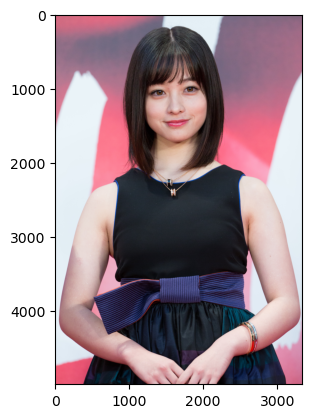

In [116]:
r, g, b = get_rgb(PATH)
print('Red Array:\n', r)
print('Green Array:\n', g)
print('Blue Array:\n', b)
plt.imshow(np.stack((r, g, b), axis=-1))

<Figure size 1600x1200 with 0 Axes>

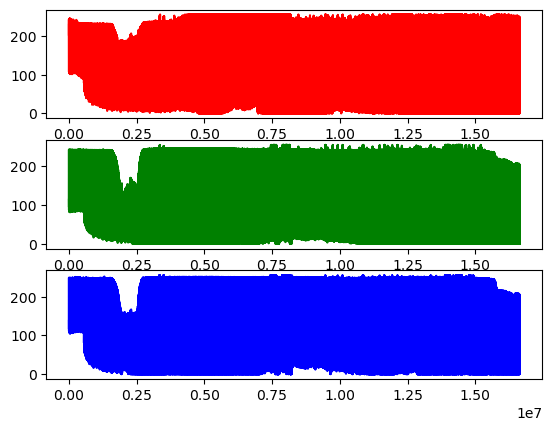

In [50]:
# Plot Each
x = np.arange(r.shape[0] * r.shape[1])
r_flatten = r.flatten()
g_flatten = g.flatten()
b_flatten = b.flatten()
plt.figure(figsize=(16, 12))
fig, ax = plt.subplots(3)
ax[0].plot(x, r_flatten, 'r')
ax[1].plot(x, g_flatten, 'g')
ax[2].plot(x, b_flatten, 'b')
plt.show()

In [69]:
def grayscale(r, g, b):
    return .299 * r + .587 * g + .114 * b

In [70]:
grayscale = grayscale(r, g, b)
grayscale = np.uint8(grayscale)
grayscale

array([[131, 136, 143, ..., 110, 117, 110],
       [139, 137, 138, ..., 112, 111, 116],
       [144, 135, 135, ..., 111, 106, 107],
       ...,
       [132, 132, 132, ..., 135, 134, 136],
       [134, 136, 136, ..., 132, 136, 139],
       [133, 133, 135, ..., 131, 132, 132]], dtype=uint8)

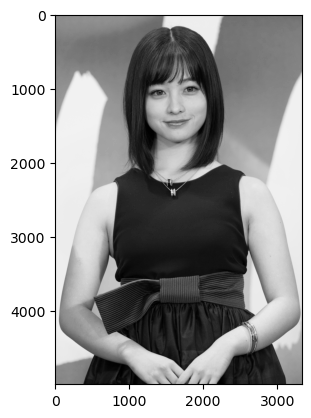

In [72]:
# Show grayscale image
plt.imshow(grayscale, cmap='gray')

In [75]:
def greyscale_to_bw(greyscale, threshold=128):
    return np.where(grayscale > threshold, 1, 0)

In [78]:
bw1 = greyscale_to_bw(grayscale)
bw1

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [99]:
bw2 = greyscale_to_bw(grayscale, 80)
bw3 = greyscale_to_bw(grayscale, 200)

Fig 1


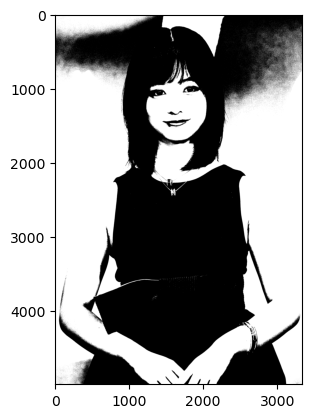

In [100]:
print('Fig 1')
plt.imshow(bw1, cmap='gray')

Fig 2


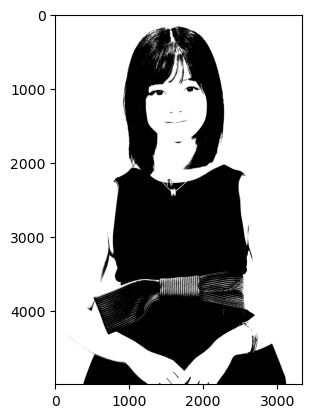

In [101]:
print('Fig 2')
plt.imshow(bw2, cmap='gray')

Fig 3


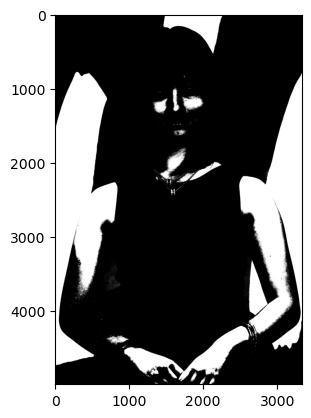

In [102]:
print('Fig 3')
plt.imshow(bw3, cmap='gray')